<a href="https://colab.research.google.com/github/Ali-Noghabi/LSTM-stock-prediction/blob/main/LSTM_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Collection
Obtain historical stock price data using the yfinance library to fetch it directly for a company like Apple (AAPL).


In [2]:
import yfinance as yf

df = yf.download('AAPL', start='2010-01-01', end='2023-01-01')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454505,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465668,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362820,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351056,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800


# Data Preprocessing
# Feature Selection:
For simplicity, use the 'Close' price as the feature to predict.

#Normalization:
Scale the data using MinMaxScaler to normalize the prices between 0 and 1.

Split the data into training and testing sets (80% , 20%)

#Create Sequences:
LSTMs require input to be in the form of sequences. so we use the last 60 days to predict the next day's price.

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

sequence_length = 60
X_train, y_train = [], []

for i in range(sequence_length, len(df_scaled)):
    X_train.append(df_scaled[i-sequence_length:i, 0])
    y_train.append(df_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(3212, 60, 1)


# The LSTM Model
- An LSTM layer with 50 units
- A Dense layer with 1 unit (output)
- Adam optimizer and Mean Squared Error as the loss function

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Predict the next closing price

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

# Train Model


In [12]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.0046 - val_loss: 0.0020
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 3.3851e-04 - val_loss: 0.0015
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 3.3175e-04 - val_loss: 0.0015
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 2.6242e-04 - val_loss: 0.0011
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - loss: 2.5633e-04 - val_loss: 0.0014
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 2.4229e-04 - val_loss: 0.0034
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 2.0533e-04 - val_loss: 0.0010
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 2.3982e-04 - val_loss: 0.0011
Epoch 9/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 2.1068e-04 - val_loss: 0.0028
Epoch 10/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 2.3440e-04 - val_loss: 0.0016
Epoch 11/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 1.6639e-04 - val_loss: 0.0011
Epoch 12/20
81/81 ━━━

# Model Evaluating

In [13]:
# Prepare the test dataset
test_data = df['Close'][-len(y_train):].values
test_data = scaler.transform(test_data.reshape(-1, 1))

X_test = []
for i in range(sequence_length, len(test_data)):
    X_test.append(test_data[i-sequence_length:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predicting
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step


# Visualizing

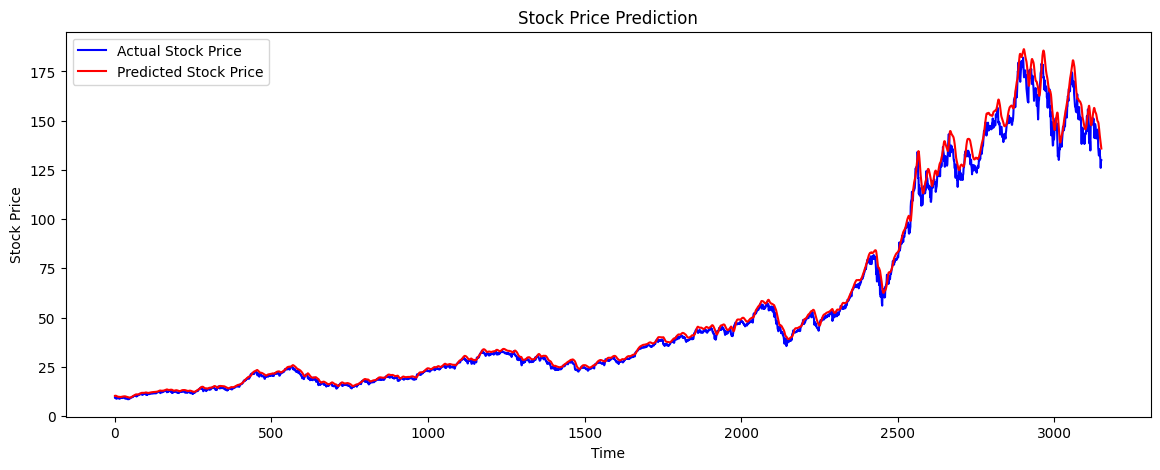

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(df['Close'][-len(predictions):].values, color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
